# **Convolutional Neural Network**

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, Reshape, Input, UpSampling2D 
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import mean_squared_error as mse, mean_absolute_error as mae
import matplotlib.pyplot as plt
from osgeo import gdal
import os
from keras.callbacks import EarlyStopping
import cv2

In [ ]:

# feature_dir = "drive/MyDrive/Dataset3/himawari/2020/10/20/03"
# bands = ['B09B', 'B10B', 'B11B', 'B12B','B14B','B16B','I2B','I4B','IRB','WVB']

# himawari_stacked = []
# # direct = result.toString()
# for i in range(len(list_himawari)):
#   res = []
#   stacked = []
#   for path in os.listdir(list_himawari[i]):
#       for band in bands:
#         splitt = list_himawari[i].split("/")
#         image_path = str(list_himawari[i]) + '/' + 'hima' + '_202010' + splitt[6] + "_" + str(band) + "_" + splitt[7] + ".tif"
#         image = gdal.Open(image_path)
#         # print(image_path)
#         band_image = image.GetRasterBand(1).ReadAsArray()
#         band_image = cv2.resize(src=band_image, dsize=(256, 256))
#         res.append(band_image)
#   stacked = np.dstack(res)

#   himawari_stacked.append(stacked)

# stacked = np.dstack(res)


# **Xử lý dữ liệu**

In [ ]:
# Divide to join
path = "drive/MyDrive/Colab Notebooks/Dataset3/"
# 7 kinds of data
datas = ['himawari','CAPE','ISOR','TCC','TCW','TCWV']
month = '/2020/10'
days = ['06','07','08','09','10','15', '16', '17', '18', '19', '20']
#Data Himawari và Radar thiếu dữ liệu lúc 8 giờ ngày 20
hours = ['00','01','02','03','04','05','06','07','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
#Himawari band
bands = ['B09B', 'B10B', 'B11B', 'B12B','B14B','B16B','I2B','I4B','IRB','WVB']

X_data = []
#Data Reading
for day in days:
    for hour in hours:
        # List image
        data_image = []
        for data in datas:
            if data == 'himawari':
                for band in bands:
                    image_path = path + data + month +"/"+ str(day) + "/" + str(hour) +'/'+ "hima" + "_202010" + str(day) + "_" + band + "_" + str(hour) + ".tif"
                    # print(image_path)
                    # print(image_path.shape)
                    image = gdal.Open(image_path)
                    image_data = image.GetRasterBand(1).ReadAsArray()
                    # Resize 
                    image_data = cv2.resize(src=image_data, dsize=(256, 256))
                    data_image.append(image_data)
            else:
                image_path = path + data + month +"/"+ str(day) + "/" + str(hour) +'/'+ data + "_202010" + str(day) + "_" + str(hour) + ".tif"
                image = gdal.Open(image_path)
                image_data = image.GetRasterBand(1).ReadAsArray()
                # Resize
                image_data = cv2.resize(src=image_data, dsize=(256, 256))
                data_image.append(image_data)
        # Chồng 15 ảnh từ 6 loại dữ liệu
        stacked = np.dstack(data_image)
        # Nối vào list data
        X_data.append(stacked)
  
# print(X_data)

X = np.stack(X_data)

print(X.shape)


(253, 256, 256, 15)


In [ ]:
#Target Data

y_data = []
for day in days:
    for hour in hours:
        image_path = path + 'radar' + month + '/' + str(day) + '/' + str(hour) + '/' + 'radar' + "_202010" + str(day) + "_" + str(hour) + ".tif"
        # print(image_path)

        image = gdal.Open(image_path)
        path_output = path + 'radar' + month + '/' + str(day) + '/' + str(hour) + '/' + 'radar' + "_202010" + str(day) + "_" + str(hour) + ".png"
        
        img_2 = gdal.Translate(path_output, image_path, outputType=gdal.GDT_Byte, scaleParams=[[0, 1]])
        image_data = img_2.GetRasterBand(1).ReadAsArray()
        # image_data = image.GetRasterBand(1).ReadAsArray()
        #Resize
        img_resized = cv2.resize(src=image_data, dsize=(256, 256))
        y_data.append(img_resized)
        # Y_data.append(image_data)

y = np.stack(y_data)

print(y.shape)

print(image_path)

(253, 256, 256)
drive/MyDrive/Colab Notebooks/Dataset3/radar/2020/10/20/23/radar_20201020_23.tif


(253, 256, 256, 15)
(253, 256, 256)

Train:
(177, 256, 256, 15)
(177, 256, 256)

Validate:
(50, 256, 256, 15)
(50, 256, 256)

Test:
(26, 256, 256, 15)
(26, 256, 256)



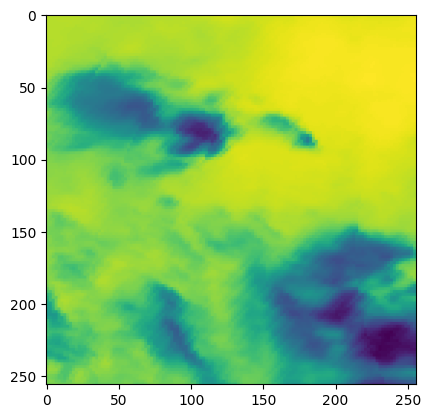

In [ ]:
# Shape X, y
print(X.shape)
print(y.shape)
print()
#Divide train/validate: 70/20/10
size = int(X.shape[0] * 0.7)

X_train = X[:size]
y_train = y[:size]

X_val = X[size: size + int(X.shape[0] * 0.2)]
y_val = y[size: size + int(X.shape[0] * 0.2)]

X_test = X[size + int(X.shape[0] * 0.2) :]
y_test = y[size + int(X.shape[0] * 0.2) :]
print('Train:')
print(X_train.shape)
print(y_train.shape)
print()

print('Validate:')
print(X_val.shape)
print(y_val.shape)
print()

print('Test:')
print(X_test.shape)
print(y_test.shape)
print()

#Test data X and y
plt.imshow(X[0, :, :, 1])
# plt.imshow(y[0, :, :])
# plt.imshow(X[10, :, :, 12])



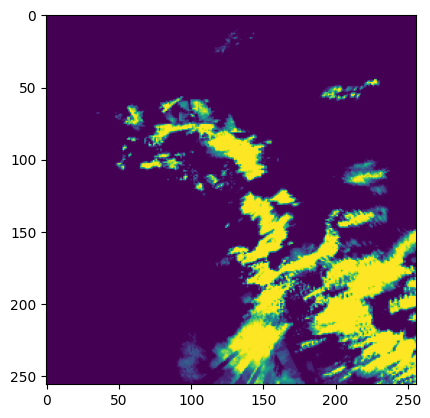

In [ ]:
# Test radar data
plt.imshow(y[5, :, :])

# **Mô hình CNN**

In [ ]:
#Create model CNN
model = Sequential()
# inputs = Input(shape=(256, 256, 15))

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256, 256, 15)))
# model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=((256,256, 15))))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 128 Filters, MaxPool.
    #------------------------------------
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
     
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=1024, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.5))

#Chuyển thành 1D
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256*256, activation='linear'))
#Reshape output image
model.add(Reshape((256, 256)))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512*512, activation='linear'))
# #Reshape output
# model.add(Reshape((512, 512)))

model.compile(optimizer='adam', loss='mse', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      4352      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [ ]:
#Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])
model.compile(optimizer='adam', loss='mse', metrics='accuracy')


# #EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

# # #Fit the model
history = model.fit(X_train, y_train, epochs = 20, batch_size = 2, 
                    validation_data = (X_val, y_val), callbacks=[early_stop])



Epoch 1/20
89/89 [==============================] - 231s 3s/step - loss: 9048.0293 - accuracy: 0.0097 - val_loss: 14695.0928 - val_accuracy: 0.0107
Epoch 2/20
89/89 [==============================] - 181s 2s/step - loss: 6990.5190 - accuracy: 0.0156 - val_loss: 14101.2334 - val_accuracy: 0.0102
Epoch 3/20
89/89 [==============================] - 173s 2s/step - loss: 6080.5327 - accuracy: 0.0164 - val_loss: 13950.9648 - val_accuracy: 0.0120
Epoch 4/20
89/89 [==============================] - 168s 2s/step - loss: 5792.0601 - accuracy: 0.0164 - val_loss: 12714.6348 - val_accuracy: 0.0088
Epoch 5/20
89/89 [==============================] - 177s 2s/step - loss: 5537.2090 - accuracy: 0.0160 - val_loss: 14930.5430 - val_accuracy: 0.0102
Epoch 6/20
89/89 [==============================] - 168s 2s/step - loss: 5427.8584 - accuracy: 0.0165 - val_loss: 14186.2764 - val_accuracy: 0.0111
Epoch 6: early stopping


In [ ]:
#Predict
y_pred = model.predict(X_test)


1/1 [==============================] - 2s 2s/step


In [ ]:
# Đánh giá model với dữ liệu validate set
score = model.evaluate(X_test, y_test, verbose = 1)
print(score)


1/1 [==============================] - 4s 4s/step - loss: 4069.3828 - accuracy: 0.0147
[4069.3828125, 0.014723557978868484]


In [ ]:
print('Test Accuracy:', score[1])
print('Test MSE:', score[0])

Test Accuracy: 0.014723557978868484
Test MSE: 4069.3828125


<ipython-input-37-40a32b6e107b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  graph = plt.subplot(subplot)


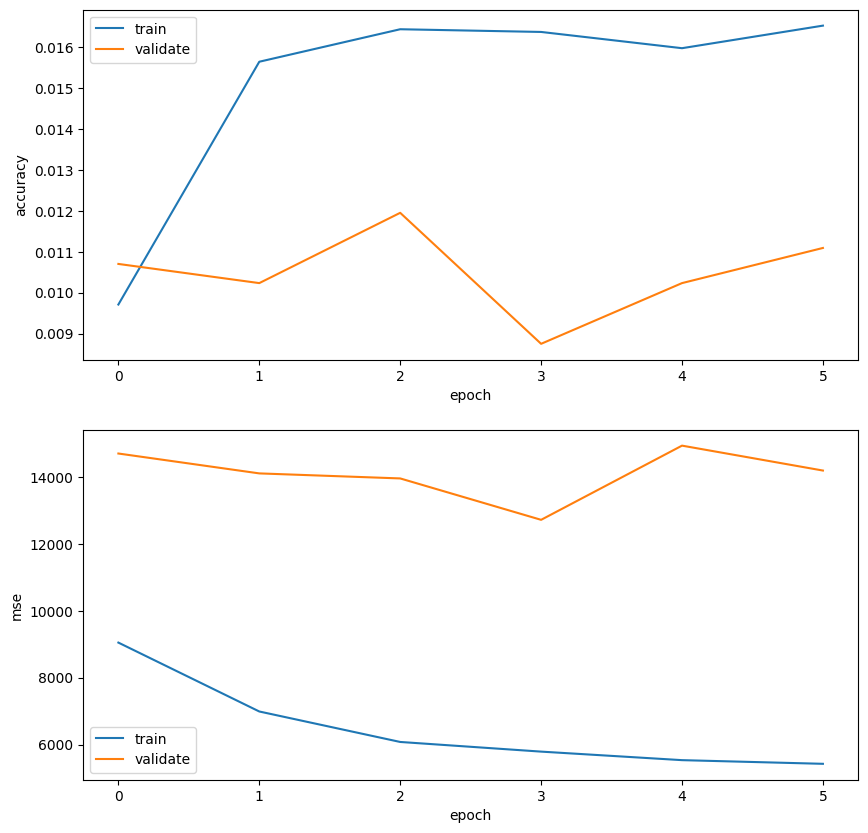

In [ ]:
#Graph
def visualization(train, val, subplot, loss):
  graph = plt.subplot(subplot)
  graph.plot(train)
  graph.plot(val)
  graph.legend(['train', 'validate'])
  graph.set_xlabel('epoch')
  graph.set_ylabel(loss)

#plt.subplots(figsize=(15,15))
plt.subplots(figsize=(10,10))
# Model
visualization(history.history['accuracy'], history.history['val_accuracy'], 211, 'accuracy')

visualization(history.history['loss'], history.history['val_loss'], 212, 'mse')
